In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# CUSTOMERS

In [155]:
customers_df= pd.read_csv("C:\\Users\\admin\\python\\Customers.csv",encoding ="ISO-8859-1")

In [157]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [159]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [161]:
#data_conversion
customers_df["Birthday"] = pd.to_datetime(customers_df['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date


In [163]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [165]:
#checking the missing values
customers_df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [13]:
#droping missing values
#customers_df.dropna(inplace=True)

In [71]:
#customers_df.isnull().sum()

In [167]:
#dropping columns

customers_df.drop(["State Code","Zip Code"],axis=1,inplace=True)

In [169]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19


In [171]:
#creating column age using datetime

today = datetime.today()
customers_df["Age"] =customers_df["Birthday"].apply(
    lambda x:today.year - x.year-((today.month,today.day)<(x.month,x.day)))

In [173]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58


# visualization 

In [90]:
#customers_df["Name"].count()

15256

In [110]:
#df=customers_df.groupby("CustomerKey")["Country"].count().reset_index()

In [114]:
#df.columns=["CustomerKey","Country"]

In [122]:
# count=customers_df.groupby(["City","State"])["Country"].sum().reset_index()

In [ ]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(20,5))
# sns.barplot(data=count,x="City",y="Country",hue="State")
# plt.title("bar chart")
# plt.show()


In [103]:
customers_df.describe()

,CustomerKey
count,1.525600e+04
mean,1.060708e+06
std,6.128604e+05
min,3.010000e+02
25%,5.134822e+05
50%,1.080114e+06
75%,1.594268e+06
max,2.099937e+06


In [141]:
#df= customers_df["CustomerKey"].count()

In [153]:
#df_1=customers_df["Country"]

In [107]:
#plt.pie(df,df_1,autopct="%1.2f%%")


In [175]:
#grouping
data=customers_df[["CustomerKey","Country"]].groupby(["Country"]).count()

In [177]:
data

,CustomerKey
Country,
Australia,1420
Canada,1553
France,670
Germany,1473
Italy,645
Netherlands,733
United Kingdom,1944
United States,6828


C:\Users\admin\AppData\Local\Temp\ipykernel_4312\2662359664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="Country",y="CustomerKey",palette='summer')


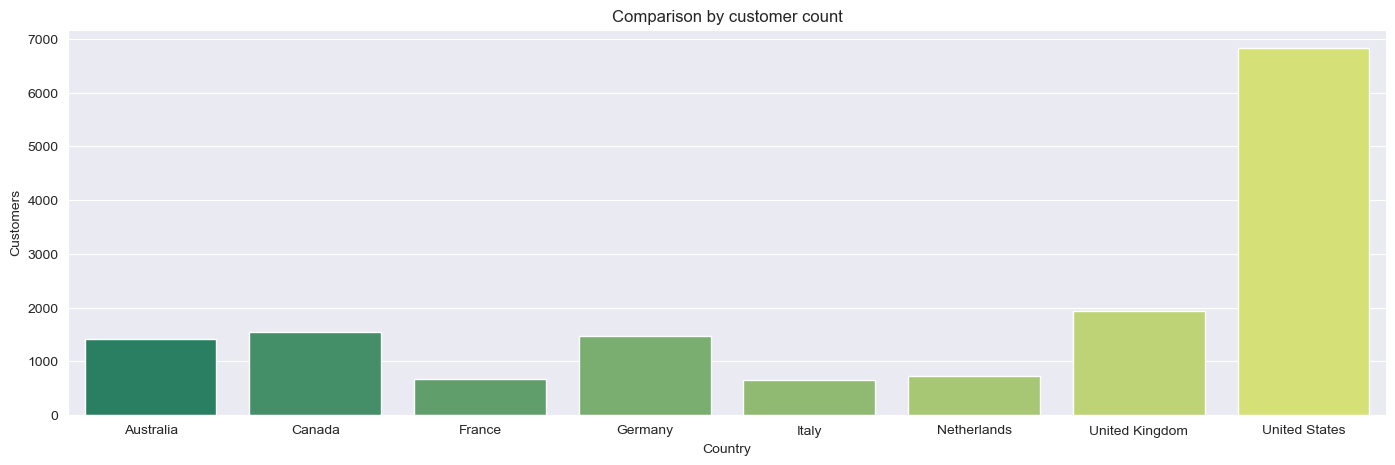

In [191]:
plt.figure(figsize=(17,5))
sns.set_style("darkgrid")
sns.barplot(data=data,x="Country",y="CustomerKey",palette='summer')
plt.ylabel("Customers")
plt.title("Comparison by customer count")
plt.show()

In [35]:
#adding new column to categorize age group

In [31]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58


In [42]:
def age_group(age):
    if age <= 19:
        return "Teenager"
    elif age >= 20 and age<= 35:
        return "Adult"
    elif age >= 36 and age<= 60:
        return "Middle-Age"
    else:
        return "Senior"

customers_df["AgeGroup"] = customers_df["Age"].apply(age_group)


In [44]:
customers_df.head()

,CustomerKey,Gender,Name,City,State,Country,Continent,Birthday,Age,AgeGroup
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,Australia,Australia,1939-07-03,85,Senior
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,Australia,Australia,1979-09-27,44,Middle-Age
2,554,Female,Claire Ferres,WINJALLOK,Victoria,Australia,Australia,1947-05-26,77,Senior
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,Australia,Australia,1957-09-17,66,Senior
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,Australia,Australia,1965-11-19,58,Middle-Age


In [46]:
#age_group=customers_df["AgeGroup"].value_counts()

In [67]:
#piechart based on agegroup

In [ ]:
# plt.figure(figsize=(17,5))
# plt.pie(age_group,labels=customers_df["Country"],autopct="%1.2f%%")
# plt.title("age_group")
# plt.show()

In [50]:
customers_df["Country"].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              635
Name: count, dtype: int64

In [52]:
data_group=customers_df[["AgeGroup","Country","Age"]].groupby(["Country","AgeGroup"]).count()

In [54]:
data_group

Age
Country        AgeGroup        
Australia      Adult        265
               Middle-Age   550
               Senior       605
Canada         Adult        310
               Middle-Age   577
               Senior       666
France         Adult        127
               Middle-Age   238
               Senior       305
Germany        Adult        278
               Middle-Age   577
               Senior       618
Italy          Adult        134
               Middle-Age   243
               Senior       258
Netherlands    Adult        142
               Middle-Age   272
               Senior       319
United Kingdom Adult        416
               Middle-Age   699
               Senior       829
United States  Adult       1403
               Middle-Age  2534
               Senior      2891

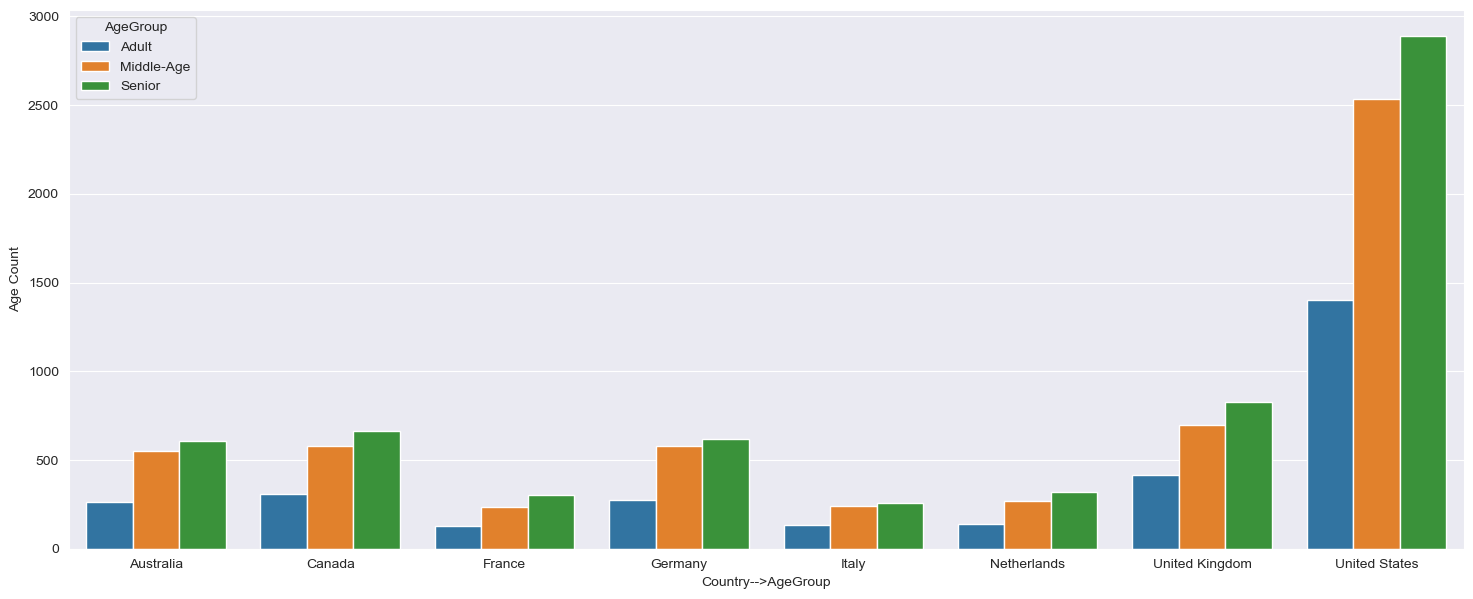

In [72]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group,x="Country",y="Age",hue="AgeGroup")
plt.ylabel("Age Count")
plt.xlabel("Country-->AgeGroup")
plt.show()

# EXCHANGE RATE

In [195]:
exchange_df=pd.read_csv("C:\\Users\\admin\\python\\Exchange_Rates.csv")

In [197]:
exchange_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [199]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [85]:
#renaming the column

In [201]:
exchange_df.rename(columns={"Currency":"CurrencyCode"},inplace=True)

In [203]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [93]:
#data conversion

In [205]:
exchange_df["Date"]=pd.to_datetime(exchange_df["Date"], format="%m/%d/%Y", errors='coerce').dt.date

In [207]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [209]:
exchange_df["Exchange"] =exchange_df["Exchange"].round(2)

In [211]:
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.00
1,2015-01-01,CAD,1.16
2,2015-01-01,AUD,1.22
3,2015-01-01,EUR,0.82
4,2015-01-01,GBP,0.64


In [213]:
#checking missing values
exchange_df.isnull().sum()

Date            0
CurrencyCode    0
Exchange        0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_4312\3965517948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=exchange_df,x="CurrencyCode",y="Exchange",palette='ocean')


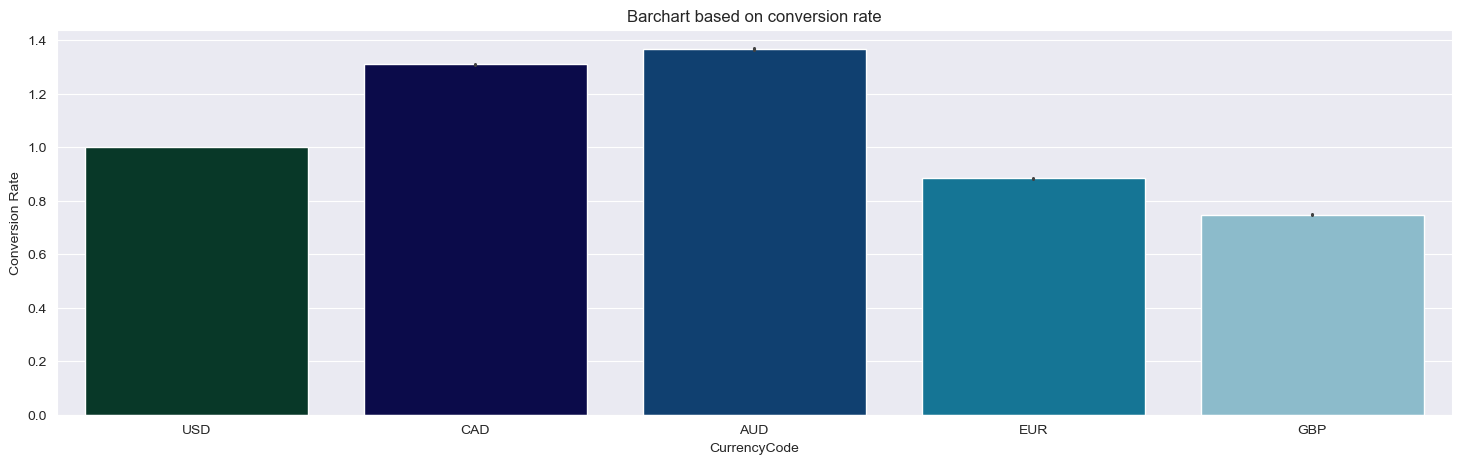

In [215]:
#barchart based on conversion rate

plt.figure(figsize=(18,5))
sns.barplot(data=exchange_df,x="CurrencyCode",y="Exchange",palette='ocean')
plt.ylabel("Conversion Rate")
plt.title("Barchart based on conversion rate")
plt.show()

# PRODUCTS

In [5]:
products_df=pd.read_csv("C:\\Users\\admin\\python\\Products.csv")

In [7]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [9]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [11]:
#checking for missing values

products_df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [13]:
#data conversion

products_df["Unit Cost USD"] = products_df["Unit Cost USD"].str.replace("$","").str.replace(",","")

In [15]:
products_df["Unit Cost USD"] =products_df["Unit Cost USD"].astype(float)

In [17]:
products_df["Unit Price USD"] = products_df["Unit Price USD"].str.replace("$","").str.replace(",","")
products_df["Unit Price USD"] =products_df["Unit Price USD"].astype(float)

In [19]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [87]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [125]:
#product_details=products_df[["Product Name","Unit Price USD","Brand","Color"]].groupby(["Product Name"]).sum().reset_index()

In [229]:
category=products_df[["Category","CategoryKey"]]

In [267]:
category_details_1=category.drop_duplicates().reset_index()

In [269]:
category_details_1

,index,Category,CategoryKey
0,0,Audio,1
1,115,TV and Video,2
2,337,Computers,3
3,943,Cameras and camcorders,4
4,1315,Cell phones,5
5,1570,"Music, Movies and Audio Books",6
6,1660,Games and Toys,7
7,1826,Home Appliances,8


In [271]:
category_details_1.drop(["index"],axis=1,inplace=True)


In [273]:
category_details_1

,Category,CategoryKey
0,Audio,1
1,TV and Video,2
2,Computers,3
3,Cameras and camcorders,4
4,Cell phones,5
5,"Music, Movies and Audio Books",6
6,Games and Toys,7
7,Home Appliances,8


In [333]:
category_details =products_df.groupby("Category").size().reset_index(name="Category_Count")


In [335]:
merged_category_details= pd.merge(category_details_1,category_details,on="Category",how="inner")

In [337]:
merged_category_details

,Category,CategoryKey,Category_Count
0,Audio,1,115
1,TV and Video,2,222
2,Computers,3,606
3,Cameras and camcorders,4,372
4,Cell phones,5,285
5,"Music, Movies and Audio Books",6,90
6,Games and Toys,7,166
7,Home Appliances,8,661


In [69]:
#pieplot

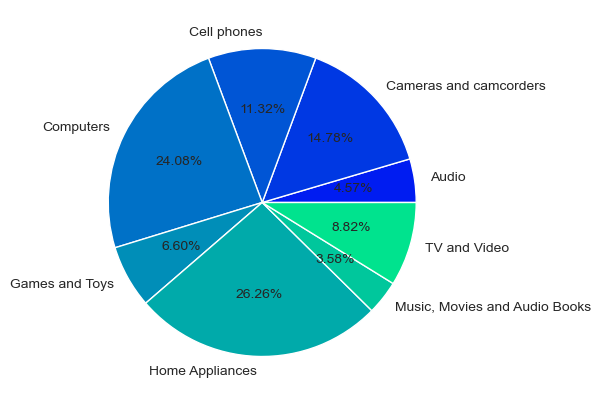

In [149]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
plt.pie(category_details["Count"],labels=category_details["Category"],autopct="%1.2f%%",colors=sns.color_palette('winter', len(category_details)))
plt.show()

In [251]:
#products_df["CategoryKey"].value_counts()

In [36]:
#category_sub=products_df[["SubcategoryKey","Subcategory","CategoryKey"]]

In [67]:
#category_sub

In [59]:
#sub_category=category_sub.drop_duplicates().reset_index()

In [65]:
#sub_category

In [339]:
sub_categories = products_df.groupby(["SubcategoryKey","Subcategory","CategoryKey"]).size().reset_index(name="Subcategory_Count")

In [341]:
sub_categories


,SubcategoryKey,Subcategory,CategoryKey,Subcategory_Count
0,101,MP4&MP3,1,45
1,104,Recording Pen,1,20
2,106,Bluetooth Headphones,1,50
3,201,Televisions,2,50
4,202,VCD & DVD,2,26
5,203,Home Theater System,2,100
6,205,Car Video,2,46
7,301,Laptops,3,78
8,303,Desktops,3,45
9,304,Monitors,3,78


C:\Users\admin\AppData\Local\Temp\ipykernel_4312\4048564383.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_categories,x="Subcategory",y="Count",palette=np.array(pal)[rank])
C:\Users\admin\AppData\Local\Temp\ipykernel_4312\4048564383.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sub_categories,x="Subcategory",y="Count",palette=np.array(pal)[rank])


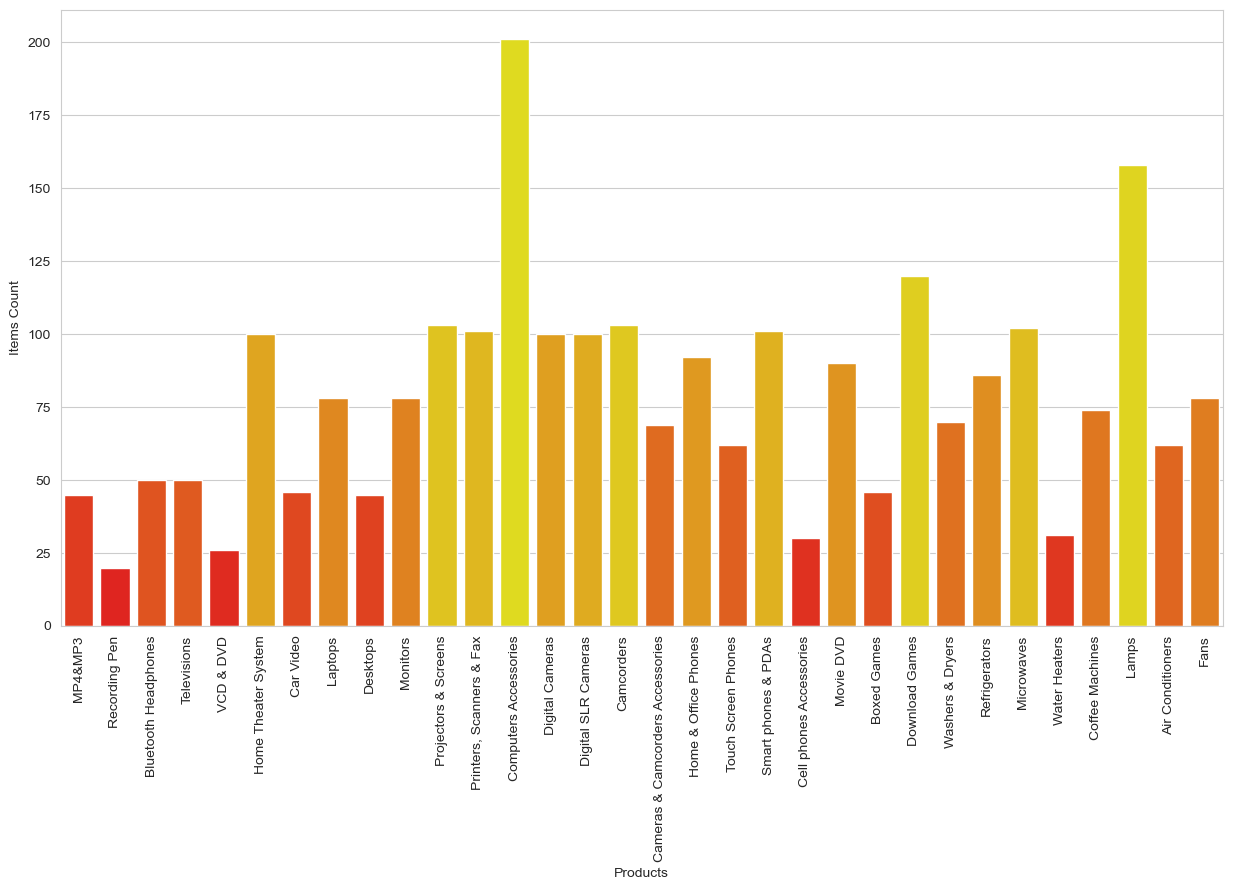

In [137]:
#barplot

plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
plt.xticks(rotation=90)
pal = sns.color_palette(palette='autumn', n_colors=len(sub_categories))
norm = sub_categories['Count'] / sub_categories['Count'].max()
rank = norm.argsort().argsort()
sns.barplot(data=sub_categories,x="Subcategory",y="Count",palette=np.array(pal)[rank])
plt.xlabel("Products")
plt.ylabel("Items Count")
plt.show()


In [343]:
products =pd.merge(merged_category_details,sub_categories,on="CategoryKey",how="inner")

In [281]:
#products.drop("Count",axis=1,inplace=True)

In [345]:
products 

,Category,CategoryKey,Category_Count,SubcategoryKey,Subcategory,Subcategory_Count
0,Audio,1,115,101,MP4&MP3,45
1,Audio,1,115,104,Recording Pen,20
2,Audio,1,115,106,Bluetooth Headphones,50
3,TV and Video,2,222,201,Televisions,50
4,TV and Video,2,222,202,VCD & DVD,26
5,TV and Video,2,222,203,Home Theater System,100
6,TV and Video,2,222,205,Car Video,46
7,Computers,3,606,301,Laptops,78
8,Computers,3,606,303,Desktops,45
9,Computers,3,606,304,Monitors,78


In [323]:
pd.set_option('display.max_colwidth', None)
product_categories=products[["Category","Subcategory"]].groupby("Category").agg(list).reset_index()

In [325]:
product_categories

,Category,Subcategory
0,Audio,"[MP4&MP3, Recording Pen, Bluetooth Headphones]"
1,Cameras and camcorders,"[Digital Cameras, Digital SLR Cameras, Camcorders, Cameras & Camcorders Accessories]"
2,Cell phones,"[Home & Office Phones, Touch Screen Phones, Smart phones & PDAs, Cell phones Accessories]"
3,Computers,"[Laptops, Desktops, Monitors, Projectors & Screens, Printers, Scanners & Fax, Computers Accessories]"
4,Games and Toys,"[Boxed Games, Download Games]"
5,Home Appliances,"[Washers & Dryers, Refrigerators, Microwaves, Water Heaters, Coffee Machines, Lamps, Air Conditioners, Fans]"
6,"Music, Movies and Audio Books",[Movie DVD]
7,TV and Video,"[Televisions, VCD & DVD, Home Theater System, Car Video]"


In [349]:
#rearranging the columns
products = pd.DataFrame(products)
reordered=["Category","Category_Count","CategoryKey","Subcategory","Subcategory_Count","SubcategoryKey" ]
df_products=products[reordered]

In [353]:
df_products

,Category,Category_Count,CategoryKey,Subcategory,Subcategory_Count,SubcategoryKey
0,Audio,115,1,MP4&MP3,45,101
1,Audio,115,1,Recording Pen,20,104
2,Audio,115,1,Bluetooth Headphones,50,106
3,TV and Video,222,2,Televisions,50,201
4,TV and Video,222,2,VCD & DVD,26,202
5,TV and Video,222,2,Home Theater System,100,203
6,TV and Video,222,2,Car Video,46,205
7,Computers,606,3,Laptops,78,301
8,Computers,606,3,Desktops,45,303
9,Computers,606,3,Monitors,78,304


In [373]:
category=df_products.groupby(["Category","Subcategory","Subcategory_Count"]).count()

In [377]:
category.drop(["Category_Count","CategoryKey","SubcategoryKey"],axis=1,inplace=True)

In [389]:
category

Empty DataFrame
Columns: []
Index: [(Audio, Bluetooth Headphones, 50), (Audio, MP4&MP3, 45), (Audio, Recording Pen, 20), (Cameras and camcorders, Camcorders, 103), (Cameras and camcorders, Cameras & Camcorders Accessories, 69), (Cameras and camcorders, Digital Cameras, 100), (Cameras and camcorders, Digital SLR Cameras, 100), (Cell phones, Cell phones Accessories, 30), (Cell phones, Home & Office Phones, 92), (Cell phones, Smart phones & PDAs, 101), (Cell phones, Touch Screen Phones, 62), (Computers, Computers Accessories, 201), (Computers, Desktops, 45), (Computers, Laptops, 78), (Computers, Monitors, 78), (Computers, Printers, Scanners & Fax, 101), (Computers, Projectors & Screens, 103), (Games and Toys, Boxed Games, 46), (Games and Toys, Download Games, 120), (Home Appliances, Air Conditioners, 62), (Home Appliances, Coffee Machines, 74), (Home Appliances, Fans, 78), (Home Appliances, Lamps, 158), (Home Appliances, Microwaves, 102), (Home Appliances, Refrigerators, 86), (Home Appliances, Washers & Dryers, 70), (Home Appliances, Water Heaters, 31), (Music, Movies and Audio Books, Movie DVD, 90), (TV and Video, Car Video, 46), (TV and Video, Home Theater System, 100), (TV and Video, Televisions, 50), (TV and Video, VCD & DVD, 26)]

In [391]:
#barplot

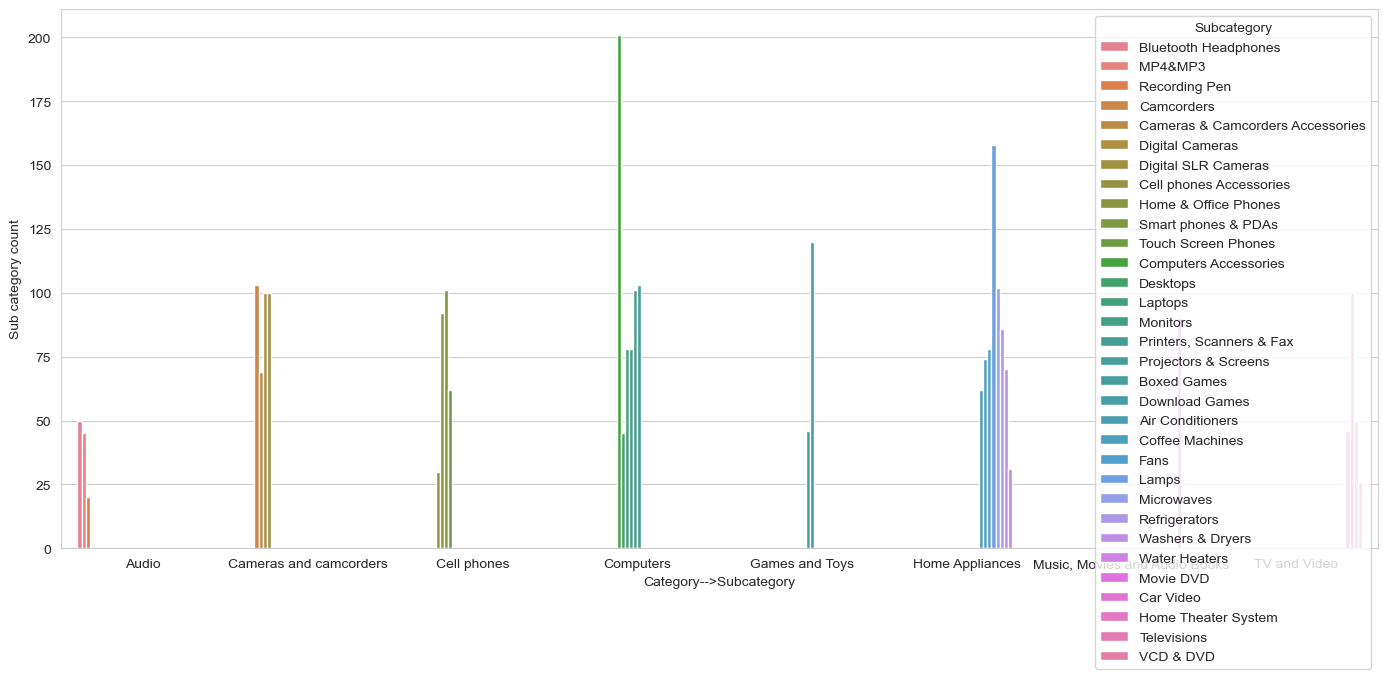

In [467]:
plt.figure(figsize=(17,7))
sns.set_style("whitegrid")
sns.barplot(data=category,x="Category",y="Subcategory_Count",hue="Subcategory")
plt.ylabel("Sub category count")
plt.xlabel("Category-->Subcategory")
plt.show()